# Hypothesis Testing with Insurance Data (Core)
- Scotty Thomason


## Assignment: we will be working with the US Health Insurance Dataset from Kaggle.

- We have been asked to use our hypothesis testing skills to answer the following questions:

1. Do smokers have higher insurance charges than non-smokers?
2. Are men more likely to smoke than women?
3. Do different regions have different charges, on average?

## For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [2]:
df= pd.read_csv("Data/insurance - insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1.) Do smokers have higher insurance charges than non-smokers?
- Null hypothesis: There is no difference between the amount of insurance cost of patients who smoke. vs. those who do not smoke.
- Alternate hypothesis: There is a difference between the amount of insurance cost of patients who smoke. vs. those who do not smoke.

-Reject" the null hypothesis 
                         OR
                         "Fail to reject" the null hypothesis.

- Determine the correct test to perform.
 - Type of Data? numeric
 - How many groups/samples? 2
 - Therefore, which test is appropriate? 2 sample t test

In [3]:
## create a column that easily separates our groups
df['is_smoker'] = df['smoker'].str.contains('yes')
df['is_smoker'].value_counts()

False    1064
True      274
Name: is_smoker, dtype: int64

In [4]:
## save list of columns needed for each group
needed_cols = ['charges','is_smoker']
df[needed_cols]

,charges,is_smoker
0,16884.92400,True
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
...,...,...
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False
1336,2007.94500,False


In [5]:
## save non-smokers in separate variable
non_smokers = df.loc[ df['is_smoker']==False, needed_cols]
non_smokers

,charges,is_smoker
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
5,3756.62160,False
...,...,...
1332,11411.68500,False
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False


In [6]:
## save smokers in separate variables
smokers = df.loc[ df['is_smoker']==True, needed_cols]
smokers

,charges,is_smoker
0,16884.92400,True
11,27808.72510,True
14,39611.75770,True
19,36837.46700,True
23,37701.87680,True
...,...,...
1313,36397.57600,True
1314,18765.87545,True
1321,28101.33305,True
1323,43896.37630,True


In [7]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([smokers,non_smokers])
plot_df

,charges,is_smoker
0,16884.9240,True
11,27808.7251,True
14,39611.7577,True
19,36837.4670,True
23,37701.8768,True
...,...,...
1332,11411.6850,False
1333,10600.5483,False
1334,2205.9808,False
1335,1629.8335,False


## Test the assumptions of your selected test.

In [8]:
## Saving JUST the numeric col as final group variables
smoker_group = smokers['charges']
non_smokers_group =  non_smokers['charges']
non_smokers_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [9]:
## Check non smokers group for outliers
non_smokers_outliers = np.abs(stats.zscore(non_smokers_group))>3

## how many outliers?
non_smokers_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [10]:
## remove outliers from non_smokers group
non_smokers_group = non_smokers_group[~non_smokers_outliers]

In [11]:
## Check smokers group for outliers
smokers_outliers = np.abs(stats.zscore(smoker_group))>3

## how many outliers?
smokers_outliers.value_counts()

False    274
Name: charges, dtype: int64

In [12]:
## remove outliers from smoker_group
smoker_group = smoker_group[~smokers_outliers]
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [13]:
## Check non_smokers group for normality
result = stats.normaltest(non_smokers_group)
result

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [14]:
## Check n for non_smokers group
len(non_smokers_group)

1040

In [15]:
## Check smokers group for normality
result = stats.normaltest(smoker_group)
result

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [16]:
## Check n for smoker group
len(smoker_group)

274

## Test for Equal Variances

In [17]:
## Use Levene's test for equal variance
result = stats.levene(smoker_group,non_smokers_group)
result
result.pvalue<.05

True

In [18]:
# Use an if-else to help interpret the p-value
if result.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


## Final Hypothesis Test

In [19]:
## run final hypothess test
result = stats.ttest_ind(smoker_group,non_smokers_group,equal_var=False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

In [20]:
## make a plot or calcualte group means to know which group had more/less.
non_smokers_group.mean(),smoker_group.mean()

(7939.8608446721155, 32050.23183153284)

Final Conclusion:
p<alpha for final t test. We reject the null hypothesis and support the alternative hypothesis that smokers have higher charges than non-smokers.

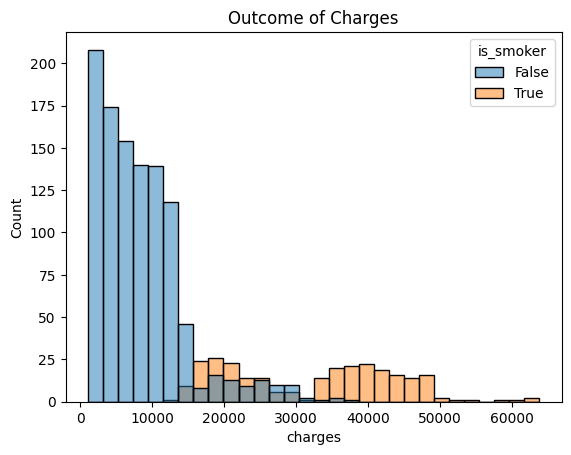

In [21]:
ax = sns.histplot(data=plot_df, x='charges', hue='is_smoker')
ax.set_title("Outcome of Charges");

## 2.) Are men more likely to smoke than women?
- Null hypothesis: There is no difference between the amount of patients who smoke that are men. vs. those who smoke that are women.
- Alternate hypothesis: There is a difference between the amount of patients who smoke that are men. vs. those who smoke that are women.

-Reject" the null hypothesis 
                         OR
                         "Fail to reject" the null hypothesis.

- Determine the correct test to perform.
 - Type of Data? categorical
 - How many groups/samples? 2
 - Therefore, which test is appropriate? 2 sample t test

In [22]:
df= pd.read_csv("Data/insurance - insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
## create a column that easily separates our groups
df['is_smoker'] = df['smoker'].str.contains('yes')
df['is_smoker'].value_counts()

False    1064
True      274
Name: is_smoker, dtype: int64

In [24]:
## save list of columns needed for each group
needed_cols = ['sex','is_smoker']
df[needed_cols]

,sex,is_smoker
0,female,True
1,male,False
2,male,False
3,male,False
4,male,False
...,...,...
1333,male,False
1334,female,False
1335,female,False
1336,female,False


In [25]:
## save female in separate variable
female_df = df.loc[ df['is_smoker']==False, needed_cols]
female_df

,sex,is_smoker
1,male,False
2,male,False
3,male,False
4,male,False
5,female,False
...,...,...
1332,female,False
1333,male,False
1334,female,False
1335,female,False


In [26]:
## save smokers in separate variables
male_df = df.loc[ df['is_smoker']==True, needed_cols]
male_df

,sex,is_smoker
0,female,True
11,female,True
14,male,True
19,male,True
23,female,True
...,...,...
1313,female,True
1314,female,True
1321,male,True
1323,female,True


In [27]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([male_df,female_df])
plot_df

,sex,is_smoker
0,female,True
11,female,True
14,male,True
19,male,True
23,female,True
...,...,...
1332,female,False
1333,male,False
1334,female,False
1335,female,False


## Test the assumptions of your selected test.

In [28]:
## Saving JUST the numeric col as final group variables
male_group = male_df['is_smoker']
female_group =  female_df['is_smoker']
female_group

1       False
2       False
3       False
4       False
5       False
        ...  
1332    False
1333    False
1334    False
1335    False
1336    False
Name: is_smoker, Length: 1064, dtype: bool

In [29]:
## Check non smokers group for outliers
female_outliers = np.abs(stats.zscore(female_group))>3

## how many outliers?
female_outliers.value_counts()

False    1064
Name: is_smoker, dtype: int64

In [30]:
## remove outliers from non_smokers group
female_group = female_group[~female_outliers]

In [31]:
## Check smokers group for outliers
male_outliers = np.abs(stats.zscore(male_group))>3

## how many outliers?
male_outliers.value_counts()

False    274
Name: is_smoker, dtype: int64

In [32]:
## remove outliers from smoker_group
male_group = male_group[~male_outliers]
male_group

0       True
11      True
14      True
19      True
23      True
        ... 
1313    True
1314    True
1321    True
1323    True
1337    True
Name: is_smoker, Length: 274, dtype: bool

In [33]:
## Check non_smokers group for normality
result = stats.normaltest(female_group)
result

NormaltestResult(statistic=nan, pvalue=nan)

In [34]:
## Check n for non_smokers group
len(female_group)

1064

In [47]:
## Check smokers group for normality
result = stats.normaltest(male_group)
result

NormaltestResult(statistic=nan, pvalue=nan)

In [36]:
## Check n for smoker group
len(male_group)

274

## Test for Equal Variances

In [49]:
## Use Levene's test for equal variance
result = stats.levene(male_group,female_group)
result
result.pvalue<.05

False

In [56]:
# Use an if-else to help interpret the p-value
if result.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


## Final Hypothesis Test

In [ ]:
## run final hypothess test
result = stats.ttest_ind(female_group,male_group,equal_var=False)
result

In [40]:
## make a plot or calcualte group means to know which group had more/less.
male_group.mean(),female_group.mean()

(1.0, 0.0)

Final Conclusion:
p<alpha for final t test. We reject the null hypothesis and support the alternative hypothesis There is a difference between the amount of patients who smoke that are men. vs. those who smoke that are women.

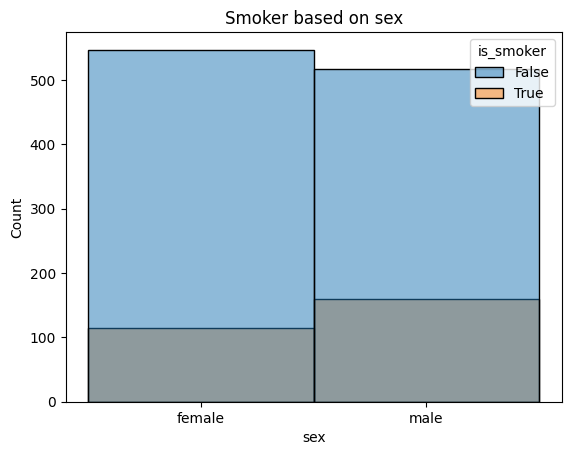

In [41]:
ax = sns.histplot(data=plot_df, x='sex', hue='is_smoker')
ax.set_title("Smoker based on sex");

## 3.) Do different regions have different charges, on average?
- Null hypothesis: There is no difference between the averages of charges of those who live in different regions.
- Alternate hypothesis: There is a difference between the averages of charges of those who live in different regions.

-Reject" the null hypothesis 
                         OR
                         "Fail to reject" the null hypothesis.

- Determine the correct test to perform.
 - Type of Data? numeric
 - How many groups/samples? 4
 - Therefore, which test is appropriate? ANOVA and/or Tukey

In [42]:
df= pd.read_csv("Data/insurance - insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [44]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [60]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [61]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


## Test for Equal Variances

In [ ]:
# with the * operator 
stats.levene(*groups.values())

## Final Hypothesis Test

In [ ]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [ ]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

Final Conclusion: p<alpha for final t test. We reject the null hypothesis and support the alternative hypothesis There is a difference between the averages of charges of those who live in the SouthEast and SouthWest region.

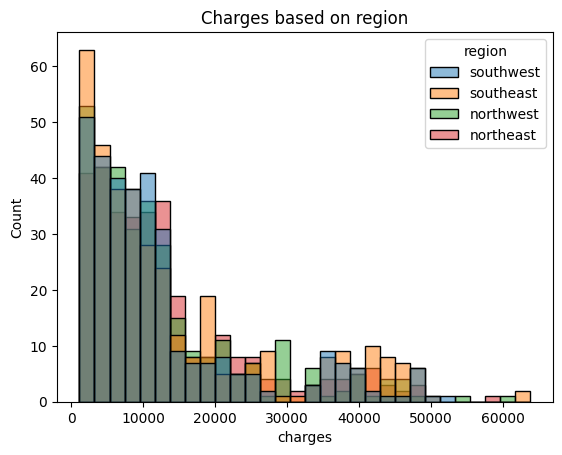

In [63]:
ax = sns.histplot(data=df, x='charges', hue='region')
ax.set_title("Charges based on region");